# The latimes theme for Altair.

Make charts the Los Angeles Times way using Python's Altair charting library.

In [24]:
import altair as alt

Import and enable the theme.

In [25]:
import altair_latimes as lat

In [26]:
alt.themes.register('latimes', lat.theme)

<function altair_latimes.theme>

In [27]:
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

Make some example charts

In [28]:
import numpy as np
import pandas as pd
from vega_datasets import data

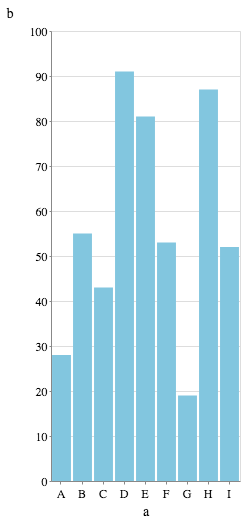

In [29]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
)

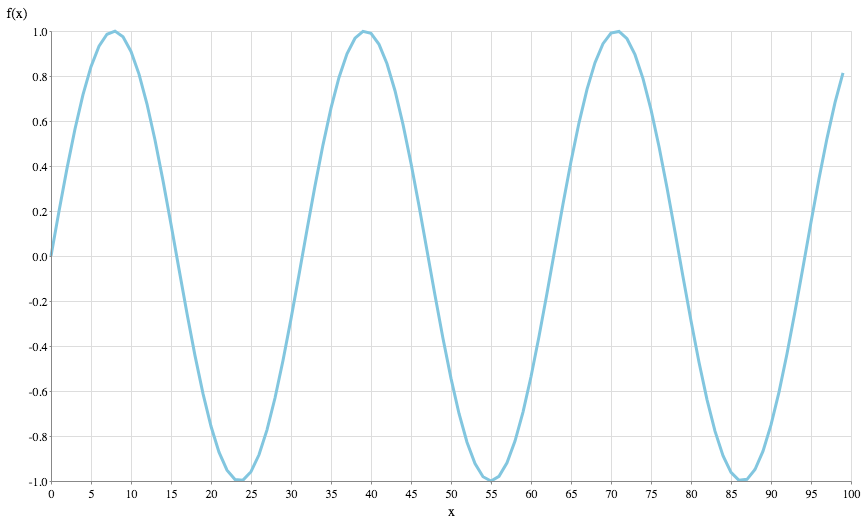

In [30]:
x = np.arange(100)
source = pd.DataFrame({
  'x': x,
  'f(x)': np.sin(x / 5)}
)

alt.Chart(source).mark_line().encode(
    x='x',
    y='f(x)'
)

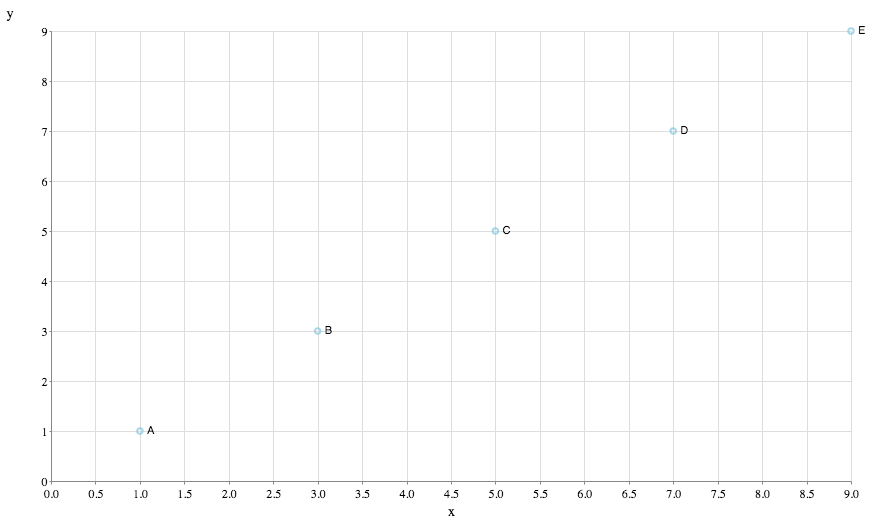

In [31]:
source = pd.DataFrame({
    'x': [1, 3, 5, 7, 9],
    'y': [1, 3, 5, 7, 9],
    'label': ['A', 'B', 'C', 'D', 'E']
})

bars = alt.Chart(source).mark_point().encode(
    x='x:Q',
    y='y:Q'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='label'
)

bars + text

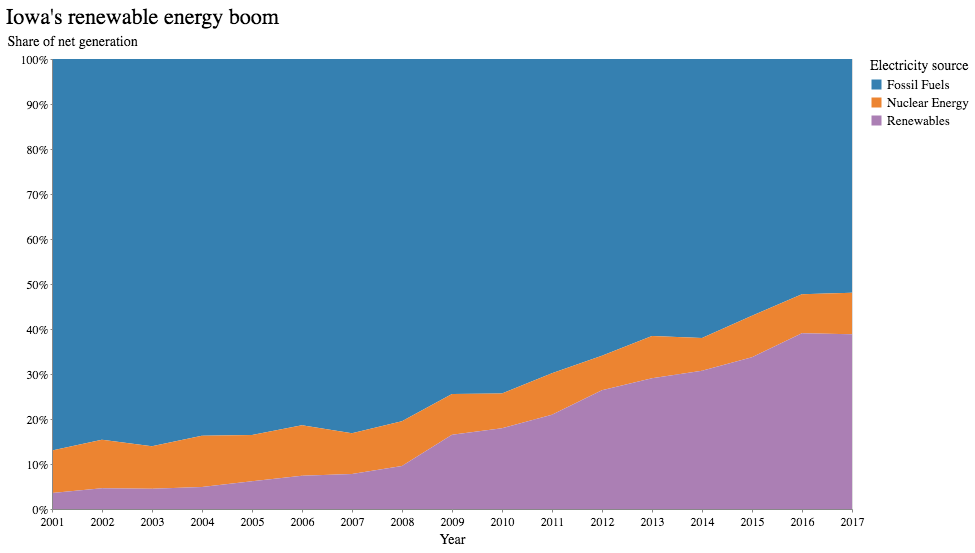

In [32]:
source = data.iowa_electricity()

alt.Chart(source, title="Iowa's renewable energy boom").mark_area().encode(
    x=alt.X(
        "year:T",
        title="Year"
    ),
    y=alt.Y(
        "net_generation:Q",
        stack="normalize",
        title="Share of net generation",
        axis=alt.Axis(format=".0%"),
    ),
    color=alt.Color(
        "source:N",
        legend=alt.Legend(title="Electricity source"),
    )
)

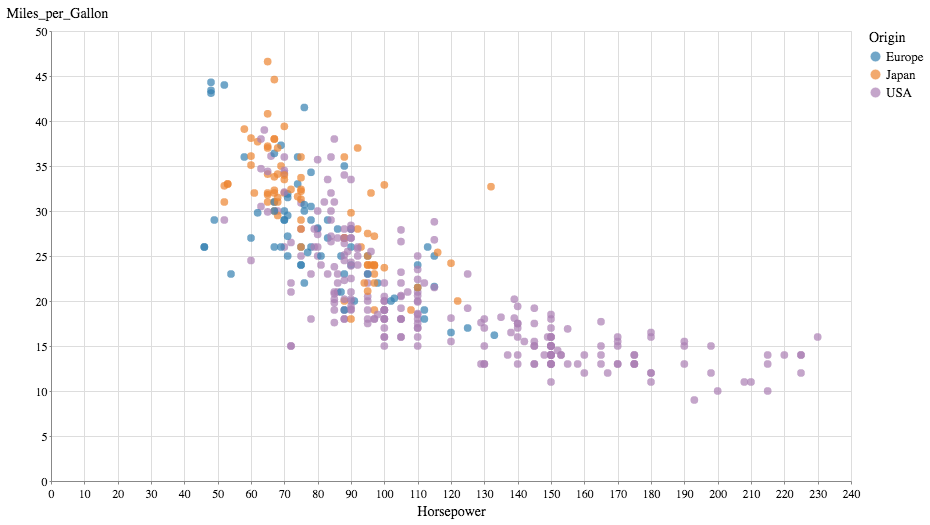

In [33]:
source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

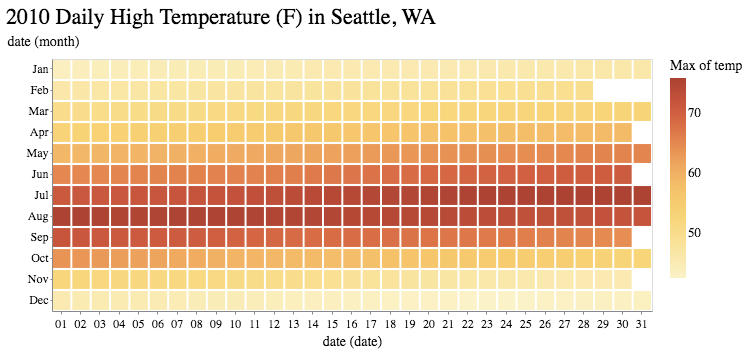

In [34]:
source = data.seattle_temps.url

alt.Chart(
    source,
    title="2010 Daily High Temperature (F) in Seattle, WA"
).mark_rect().encode(
    x=alt.X('date:O', timeUnit='date'),
    y=alt.Y('date:O', timeUnit='month'),
    color=alt.Color('temp:Q', aggregate='max'),
    tooltip=[
        alt.Tooltip('date:T', timeUnit='monthdate', title='Date'),
        alt.Tooltip('temp:Q', aggregate='max', title='Max Temp')
    ]
).properties(width=600)

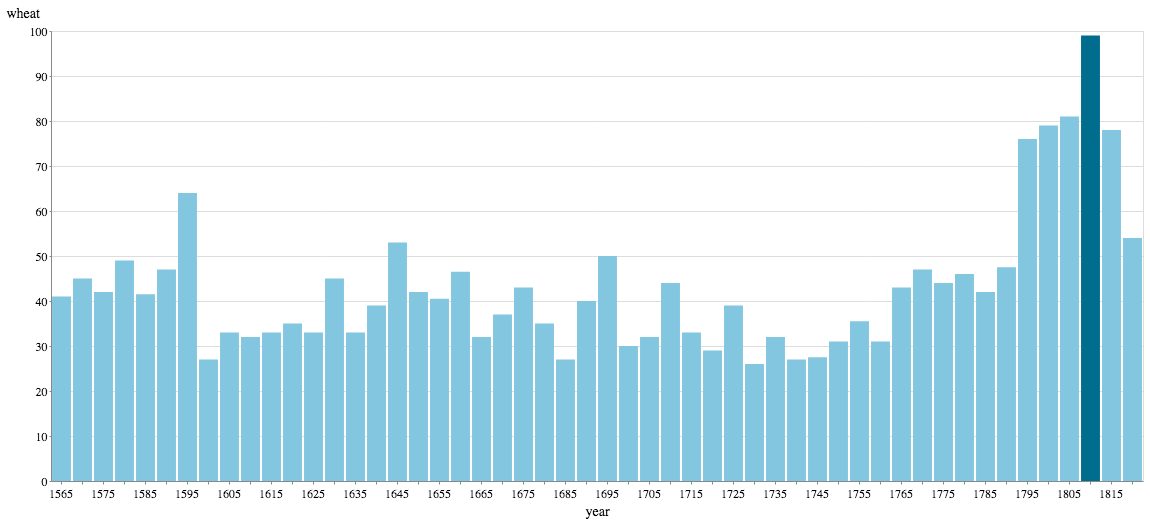

In [35]:
source = data.wheat()

alt.Chart(source).mark_bar().encode(
    x='year:O',
    y="wheat:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.year == 1810,  # If the year is 1810 this test returns True,
        alt.value(lat.palette['accent']),     # which sets the bar orange.
        alt.value(lat.palette['default'])   # And if it's not true it sets the bar steelblue.
    )
)

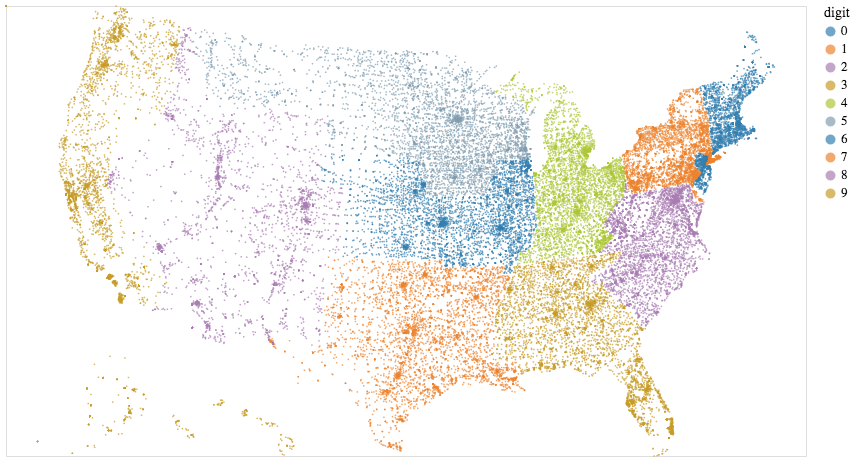

In [36]:
source = data.zipcodes.url

alt.Chart(source).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='digit:N'
).project(
    type='albersUsa'
).transform_calculate(
    "digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
)

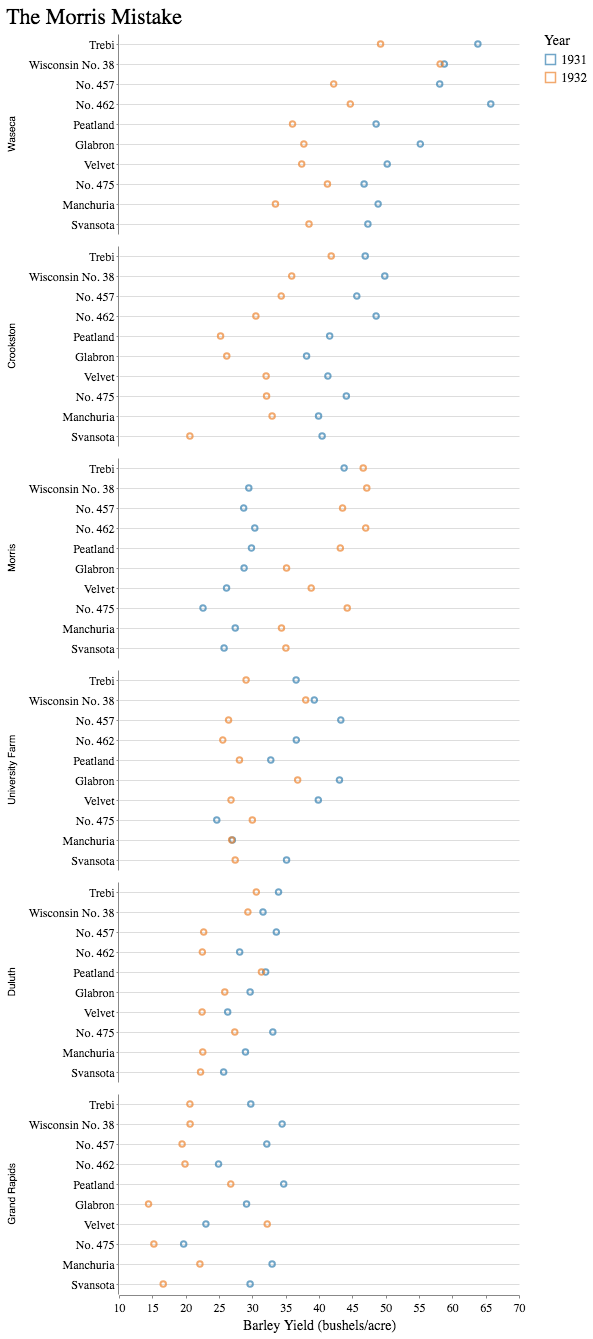

In [37]:
source = data.barley()

alt.Chart(source, title="The Morris Mistake").mark_point().encode(
    alt.X(
        'yield:Q',
        title="Barley Yield (bushels/acre)",
        scale=alt.Scale(zero=False),
        axis=alt.Axis(grid=False)
    ),
    alt.Y(
        'variety:N',
        title="",
        sort=alt.EncodingSortField(field='yield', op='sum', order='descending'),
        scale=alt.Scale(rangeStep=20),
        axis=alt.Axis(grid=True)
    ),
    color=alt.Color('year:N', legend=alt.Legend(title="Year")),
    row=alt.Row(
        'site:N',
        title="",
        sort=alt.EncodingSortField(field='yield', op='sum', order='descending'),
    )
).configure_view(stroke="transparent", width=400, height=300)

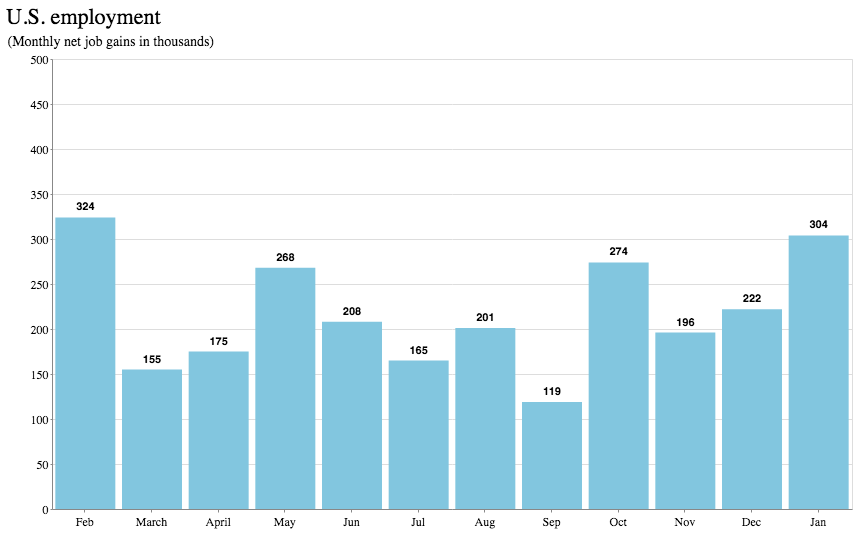

In [41]:
highlight = 'Jan'

source = pd.DataFrame({
    'a': ['Feb', 'March', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan'],
    'b': [324, 155, 175, 268, 208, 165, 201, 119, 274, 196, 222, 304]
})

bars = alt.Chart(source, title='U.S. employment').mark_bar().encode(
    x=alt.X('a:N', title=None, sort=alt.EncodingSortField(field='a', op='count', order='ascending')),
    y=alt.Y('b:Q', title="(Monthly net job gains in thousands)", scale=alt.Scale(domain=(0, 500))),
)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dx=0,
    dy=-10,
    fontWeight='bold',
    color='#000000',
).encode(
    text='b:Q'
)

(bars + text + watermark).properties(width=800, height=450)

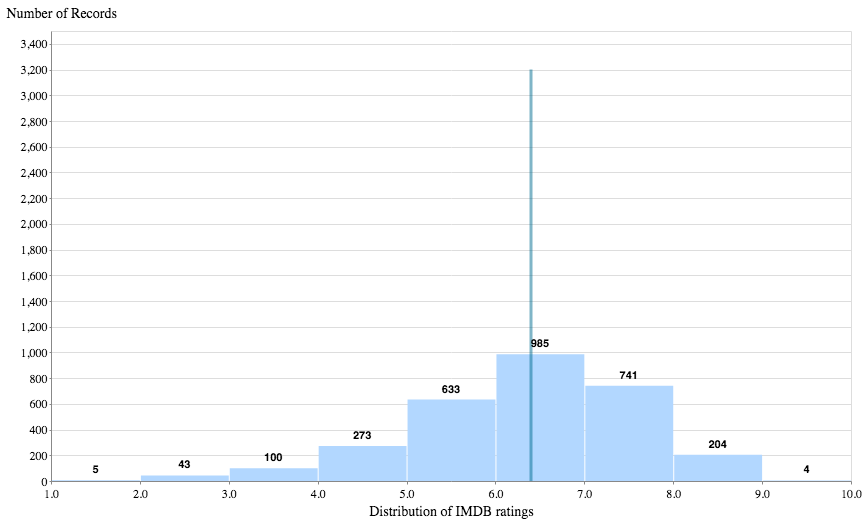

In [17]:
source = data.movies.url

output = alt.Chart(source).mark_bar(size=20, color='highlight').encode(
    x=alt.X('IMDB_Rating:Q', bin=True, title='Distribution of IMDB ratings'),
    y=alt.Y('count()'),
)

text = output.mark_text(
    align='center',
    baseline='middle',
    dx=0,
    dy=-10,
    fontWeight='bold',
).encode(
    text='count():Q'
)

median = output.mark_rule(color='#006d8f', opacity=.5).encode(
    x='median(IMDB_Rating):Q',
    size=alt.value(3)
)

(output + median + text)